In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from matplotlib.patches import Ellipse, Circle
import ast

from IPython.display import HTML

In [2]:
# read csv with these columns and datatypes
seed = 4
dtypes = {
    'regime_idx': 'int32',
    'frame_idx': 'int32',
    'a1x': 'int32',
    'a1y': 'int32',
    'a2x': 'int32',
    'a2y': 'int32',
    'reward_loc': 'str',
    'r1': 'float32',
    'r2': 'float32',
    'activated': 'bool',
    'collected': 'bool',
    'terminated': 'bool',
    'steps_without_reward': 'int16'
} 
tdf = pd.read_csv(f'pc/train_history_data_{seed}.csv', dtype=dtypes)
edf = pd.read_csv(f'pc/test_history_data_{seed}.csv', dtype=dtypes)

In [3]:
# tdf[tdf.regime_idx == 3]
tdf[:50]

,regime_idx,frame_idx,a1x,a1y,a2x,a2y,reward_loc,r1,r2,activated,collected,terminated,steps_without_reward
0,0,0,3,3,3,2,NaN,-1.0,-1.0,False,False,False,1
1,0,1,3,3,4,2,NaN,-1.0,-1.0,False,False,False,2
2,0,2,3,2,4,3,NaN,-1.0,-1.0,False,False,False,3
3,0,3,3,3,3,3,NaN,-1.0,-1.0,False,False,False,4
4,0,4,4,3,4,3,NaN,-1.0,-1.0,False,False,False,5
5,0,5,4,3,4,4,NaN,-1.0,-1.0,False,False,False,6
6,0,6,3,3,4,3,NaN,-1.0,-1.0,False,False,False,7
7,0,7,3,4,4,3,NaN,-1.0,-1.0,False,False,False,8
8,0,8,3,3,4,3,NaN,-1.0,-1.0,False,False,False,9
9,0,9,4,3,4,4,NaN,-1.0,-1.0,False,False,False,10


### Trial counts

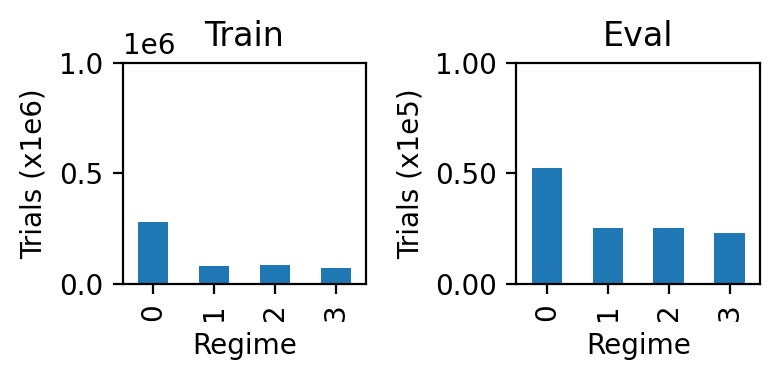

In [4]:
def plt_trial_counts(tdf, edf):
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=200)
    tdf.groupby(tdf.regime_idx).terminated.sum().plot.bar(figsize=(4, 2), xlabel='Regime', ylabel='Trials (x1e6)', title='Train', ylim=(0,1e6), ax=ax[0])
    edf.groupby(edf.regime_idx).terminated.sum().plot.bar(figsize=(4, 2), xlabel='Regime', ylabel='Trials (x1e5)', title='Eval', ylim=(0,1e5), ax=ax[1])
    ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e5:.2f}'))
    plt.tight_layout()
    plt.show()
    
plt_trial_counts(tdf, edf)

### Performance

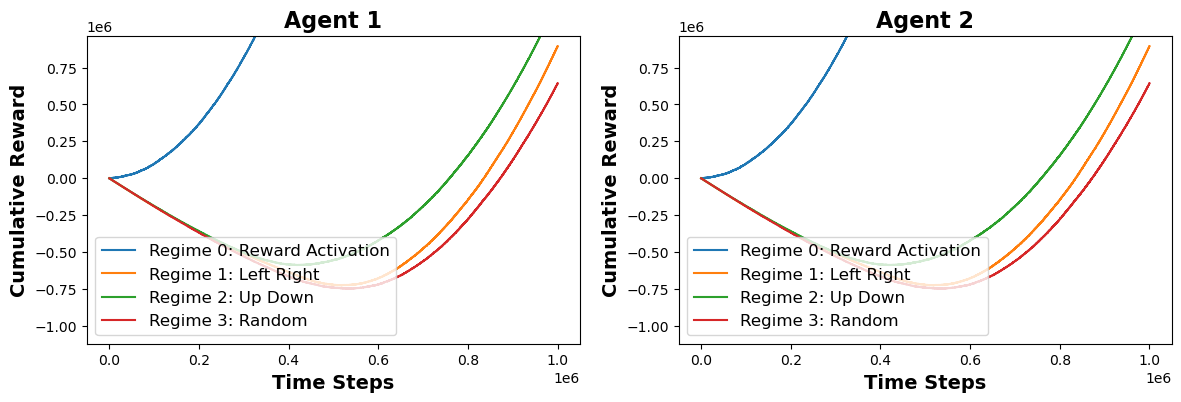

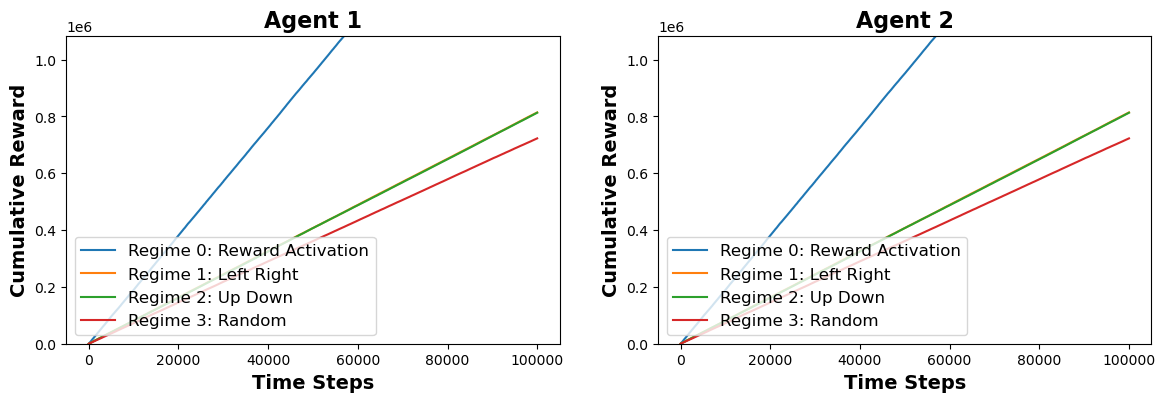

In [5]:
def plot_cumulative_rewards(df):
    regime_names = ['Regime 0: Reward Activation', 'Regime 1: Left Right', 'Regime 2: Up Down', 'Regime 3: Random']
    fig, ax = plt.subplots(1,2,figsize=(14, 4))
    # Loop through each regime and compute cumulative rewards
    for agent, ax in enumerate(ax.flatten()):
        for regime in range(4):
            df_regime = df[df["regime_idx"] == regime]
            crh = np.cumsum(df_regime["r1"] + df_regime["r2"])  # Summing both agents' rewards
            ax.plot(df_regime["frame_idx"], crh, label=regime_names[regime])

        ax.set_ylabel('Cumulative Reward', fontsize=14, fontweight='bold')
        ax.set_xlabel('Time Steps', fontsize=14, fontweight='bold')
        ax.set_ylim(min(crh)+min(crh)*0.5, max(crh * 1.5))
        ax.legend(loc="lower left", fontsize=12)
        ax.set_title(f'Agent {agent + 1}', fontsize=16, fontweight='bold')
    plt.show()
plot_cumulative_rewards(tdf)
plot_cumulative_rewards(edf)

### Activations

In [6]:
def plot_reward_activation_proportions_by_regime(df):
    regime_names = ['Regime 0: Reward Activation', 'Regime 1: Left Right', 'Regime 2: Up Down', 'Regime 3: Random']
    # Create activation indicator columns for each agent and overall.
    df['a1_activate'] = (df['a1x'] == 2) & (df['a1y'] == 2)
    df['a2_activate'] = (df['a2x'] == 2) & (df['a2y'] == 2)
    df['activated_any'] = df['a1_activate'] | df['a2_activate']
    
    # Create an episode identifier within each regime using cumulative sum of termination.
    df['episode'] = df.groupby('regime_idx')['terminated'].cumsum()
    
    # Function to determine activation type for each episode group.
    def get_activation_type(group):
        # Look for the first frame in this episode where either agent activates.
        act_rows = group[group['activated_any']]
        if act_rows.empty:
            return "None"
        first_row = act_rows.iloc[0]
        if first_row['a1_activate'] and first_row['a2_activate']:
            return "Tie"
        elif first_row['a1_activate']:
            return "Agent 1"
        elif first_row['a2_activate']:
            return "Agent 2"
        return "None"
    
    # Compute the activation type for each episode (grouped by regime and episode)
    activation_types = df.groupby(['regime_idx', 'episode'], sort=False).apply(get_activation_type, include_groups=False)
    
    # Prepare a 2x2 grid for the four regimes.
    regimes = sorted(df['regime_idx'].unique())
    fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharey=True)
    axes = axes.flatten()
    
    for i, regime in enumerate(regimes):
        ax = axes[i]
        # Get activation types for the current regime.
        reg_activation = activation_types.loc[regime]
        # Count frequencies; ensure all four categories are present.
        counts = reg_activation.value_counts().reindex(["None", "Tie", "Agent 1", "Agent 2"], fill_value=0)
        total = counts.sum()
        proportions = counts / total if total > 0 else counts
        
        # Plot the bar chart.
        categories = proportions.index.tolist()
        values = proportions.values.tolist()
        bars = ax.bar(categories, values, color=['gray', 'orange', 'blue', 'green'])
        
        # Use the given styling.
        ax.set_ylabel('Proportion', fontsize=14, fontweight='bold')
        ax.set_xlabel('Activation Type', fontsize=14, fontweight='bold')
        ax.set_ylim(0, 1)
        legend_labels = [f"None: {proportions['None']:.2f}",
                         f"Tie: {proportions['Tie']:.2f}",
                         f"Agent 1: {proportions['Agent 1']:.2f}",
                         f"Agent 2: {proportions['Agent 2']:.2f}"]
        ax.legend(bars, legend_labels, loc="upper right", fontsize=12)
        ax.set_title(f'{regime_names[regime]}', fontsize=16, fontweight='bold')
    plt.suptitle('Reward Activations', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()


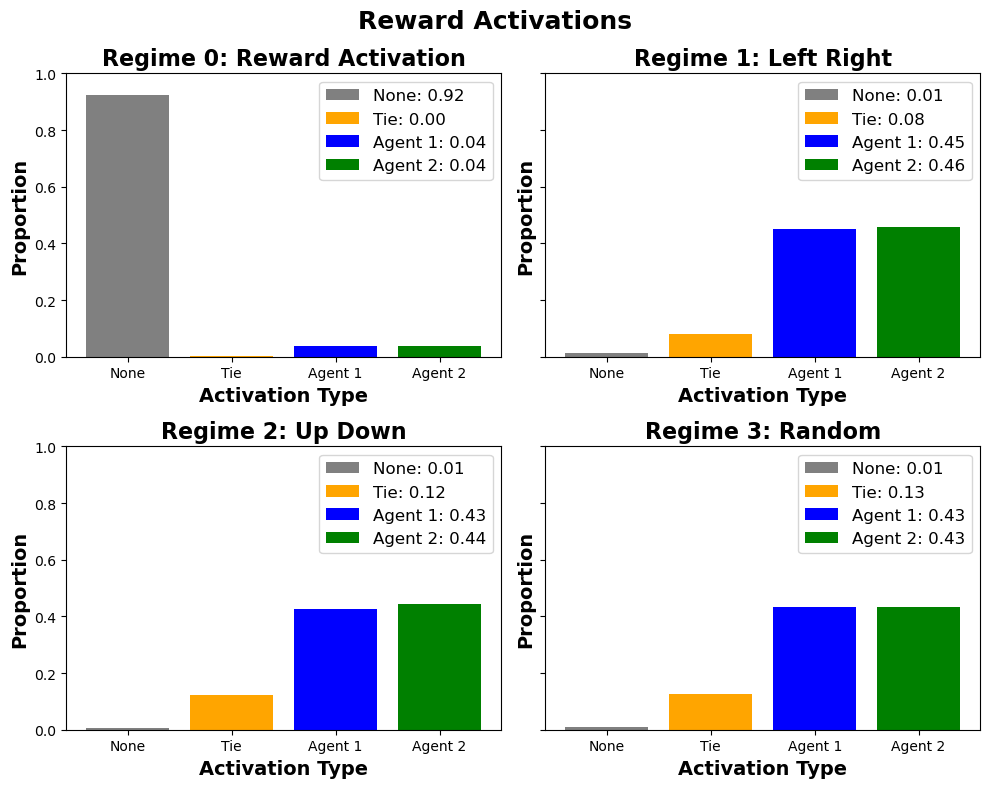

In [7]:
plot_reward_activation_proportions_by_regime(tdf)

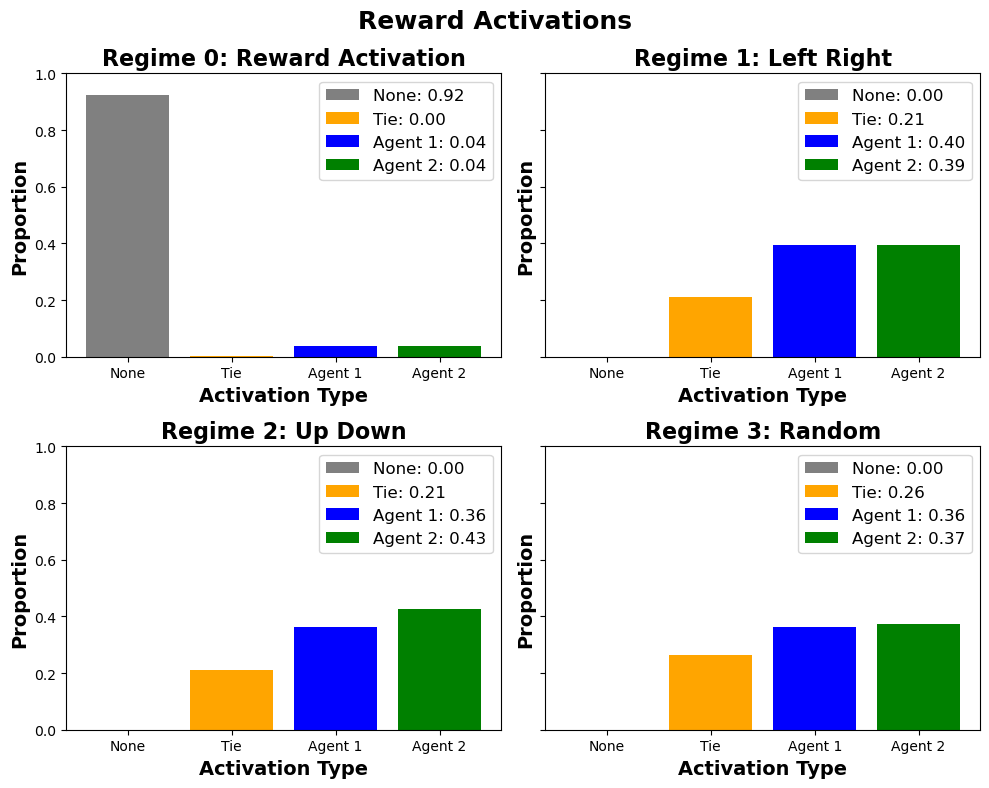

In [8]:
plot_reward_activation_proportions_by_regime(edf)

### Reward collection proportion by regime

In [14]:
def plot_reward_collection_proportions_by_regime(df):
    regime_names = ['Regime 0: Reward Activation', 'Regime 1: Left Right', 'Regime 2: Up Down', 'Regime 3: Random'] 
    # Create an episode identifier within each regime using cumulative sum of termination.
    df['episode'] = df.groupby('regime_idx')['terminated'].cumsum()
    
    # Function to determine reward collection type for each episode group.
    def get_collection_type(group):
        # Find the first frame where the reward was collected.
        collected_rows = group[group['collected']]
        if collected_rows.empty:
            return "None"
        first_row = collected_rows.iloc[0]
        # Determine collection type based on reward values.
        # We assume that a positive reward (> 0) indicates collection.
        r1 = first_row['r1']
        r2 = first_row['r2']
        if r1 > 0 and r2 > 0:
            return "Tie"
        elif r1 > 0:
            return "Agent 1"
        elif r2 > 0:
            return "Agent 2"
        else:
            return "None"
    
    # Compute the collection type for each episode by grouping by regime and episode.
    collection_types = df.groupby(['regime_idx', 'episode'], sort=False).apply(get_collection_type, include_groups=False)
    
    # Prepare a 2x2 grid for the four regimes.
    regimes = sorted(df['regime_idx'].unique())
    fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharey=True)
    axes = axes.flatten()
    
    for i, regime in enumerate(regimes):
        ax = axes[i]
        # Get collection types for the current regime.
        reg_collection = collection_types.loc[regime]
        # Count frequencies; ensure all four categories are present.
        counts = reg_collection.value_counts().reindex(["None", "Tie", "Agent 1", "Agent 2"], fill_value=0)
        total = counts.sum()
        proportions = counts / total if total > 0 else counts
        
        # Plot the bar chart.
        categories = proportions.index.tolist()
        values = proportions.values.tolist()
        bars = ax.bar(categories, values, color=['gray', 'orange', 'blue', 'green'])
        
        # Use styling similar to your provided snippet.
        ax.set_ylabel('Proportion', fontsize=14, fontweight='bold')
        ax.set_xlabel('Collection Type', fontsize=14, fontweight='bold')
        ax.set_ylim(0, 1)
        # Legend with the rounded proportions.
        legend_labels = [f"None: {proportions['None']:.2f}",
                         f"Tie: {proportions['Tie']:.2f}",
                         f"Agent 1: {proportions['Agent 1']:.2f}",
                         f"Agent 2: {proportions['Agent 2']:.2f}"]
        ax.legend(bars, legend_labels, loc="upper right", fontsize=12)
        ax.set_title(regime_names[regime], fontsize=16, fontweight='bold')
    plt.suptitle('Reward Collections', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()


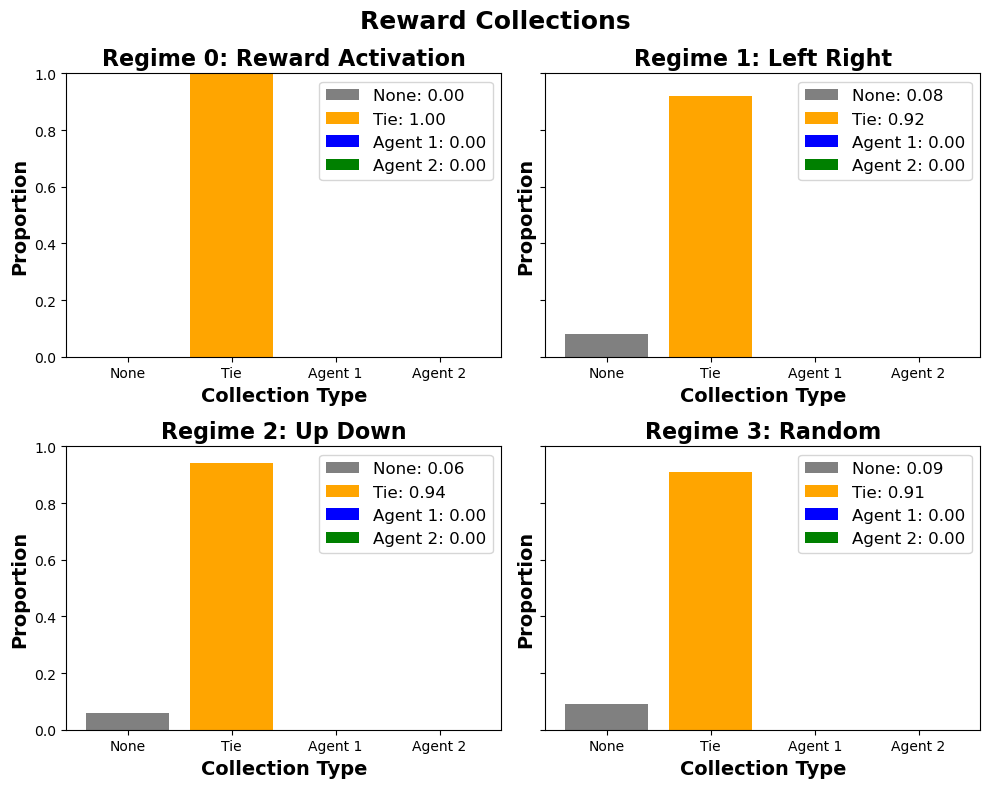

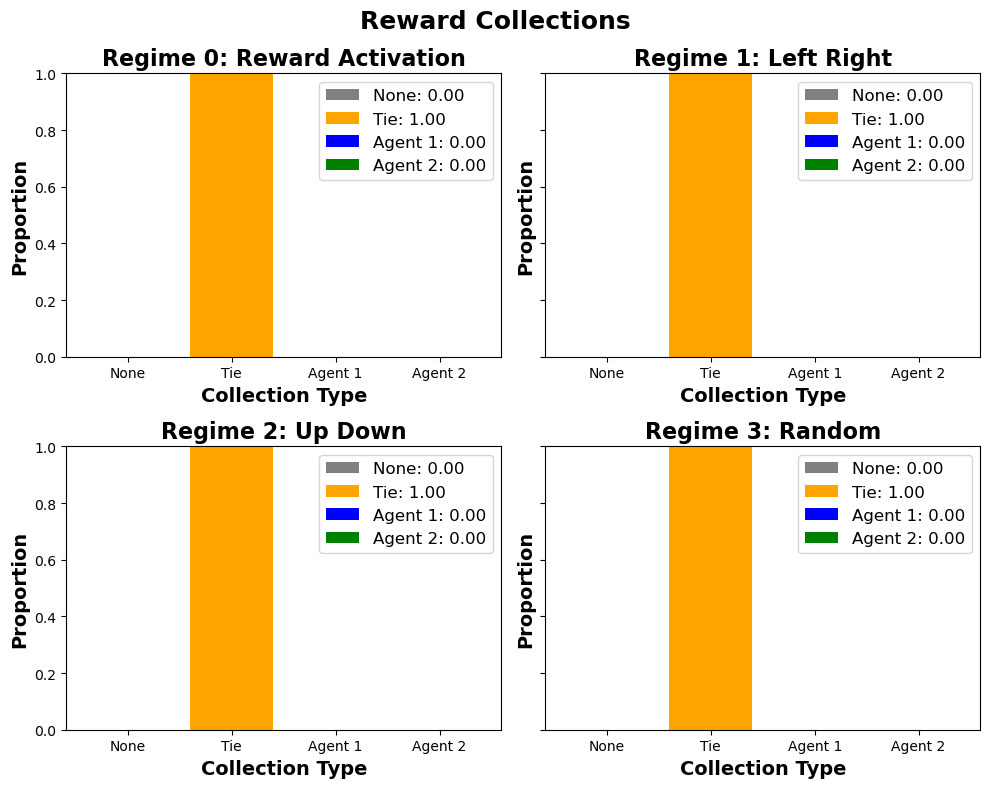

In [15]:
plot_reward_collection_proportions_by_regime(tdf)
plot_reward_collection_proportions_by_regime(edf)

### Animation stepping

In [11]:
def rotate_point(x, y, center_x, center_y, angle):
    """Rotate a point (x, y) around a center (center_x, center_y) by a given angle (in degrees)."""
    angle_rad = np.radians(angle)
    x -= center_x
    y -= center_y
    x_new = x * np.cos(angle_rad) - y * np.sin(angle_rad)
    y_new = x * np.sin(angle_rad) + y * np.cos(angle_rad)
    return x_new + center_x, y_new + center_y

def get_reward_coord(direction, grid_size):
    """
    Given a direction string ('up', 'down', 'left', 'right'),
    return the corresponding board coordinate.
      - 'up'    => top center: (grid_size//2, grid_size - 1)
      - 'down'  => bottom center: (grid_size//2, 0)
      - 'left'  => left center: (0, grid_size//2)
      - 'right' => right center: (grid_size - 1, grid_size//2)
    """
    if direction == 'up':
        return (grid_size // 2, grid_size - 1)
    elif direction == 'down':
        return (grid_size // 2, 0)
    elif direction == 'left':
        return (0, grid_size // 2)
    elif direction == 'right':
        return (grid_size - 1, grid_size // 2)
    else:
        return None

def animate_simulation_by_df(df, regime, start_frame, end_frame, grid_size=11, interval=100):
    """
    Create an animation for a given regime and frame range.
    
    Parameters:
      df         : DataFrame with columns ['regime_idx', 'frame_idx', 'a1x', 'a1y', 'a2x', 'a2y',
                                             'reward_loc', 'r1', 'r2', 'activated', 'collected',
                                             'terminated', 'steps_without_reward']
      regime     : The regime index to animate.
      start_frame: Starting frame number (inclusive).
      end_frame  : Ending frame number (inclusive).
      grid_size  : The size of the board (default 11).
      interval   : Interval (in ms) between frames.
    
    Returns:
      ani        : The matplotlib.animation.FuncAnimation object.
    """
    # matplotlib.use('Agg')
    # Filter by regime and frame range.
    subdf = df[(df['regime_idx'] == regime) & 
               (df['frame_idx'] >= start_frame) & 
               (df['frame_idx'] <= end_frame)].sort_values('frame_idx')
    # Pre-extract necessary columns (including metadata) into a record array.
    steps = subdf[['a1x', 'a1y', 'a2x', 'a2y', 'reward_loc',
                    'steps_without_reward', 'activated', 'collected', 'terminated']].to_records(index=False)
    
    # Set up the figure and axis.
    fig, ax = plt.subplots(figsize=(6,6), dpi=80)
    ax.set_xlim(-0.5, grid_size-0.5)
    ax.set_ylim(-0.5, grid_size-0.5)
    ax.set_xticks(np.arange(-0.5, grid_size, 1))
    ax.set_yticks(np.arange(-0.5, grid_size, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True, color='gray')
    # ax.legend().remove()
    
    # Create agent shapes.
    # Agent 1 (lightblue)
    agent1_mouse = Ellipse((0, 0), 0.15, 0.4, angle=45, color='lightblue', alpha=0.75, label="Agent 1")
    agent1_ear1  = Circle((0.1, 0.1), 0.08, color='lightblue', alpha=0.75)
    agent1_ear2  = Circle((-0.1, 0.1), 0.08, color='lightblue', alpha=0.75)
    agent1_tail  = Ellipse((0, -0.25), 0.03, 0.25, angle=45, color='lightblue', alpha=0.75)
    
    # Agent 2 (coral)
    agent2_mouse = Ellipse((0, 0), 0.15, 0.4, angle=-45, color='coral', alpha=0.75, label="Agent 2")
    agent2_ear1  = Circle((0.1, 0.1), 0.08, color='coral', alpha=0.75)
    agent2_ear2  = Circle((-0.1, 0.1), 0.08, color='coral', alpha=0.75)
    agent2_tail  = Ellipse((0, -0.25), 0.03, 0.25, angle=-45, color='coral', alpha=0.75)
    
    for patch in [agent1_mouse, agent1_ear1, agent1_ear2, agent1_tail,
                  agent2_mouse, agent2_ear1, agent2_ear2, agent2_tail]:
        ax.add_patch(patch)
    
    # Create reward markers (two possible locations).
    reward_marker1, = ax.plot([], [], 'go', alpha=0.5, markersize=16, label="Reward", antialiased=False)
    reward_marker2, = ax.plot([], [], 'go', alpha=0.5, markersize=16, label="Reward", antialiased=False)
    
    # Create a center marker for the activation zone (yellow square).
    center_marker, = ax.plot([], [], 'ys', alpha=0.5, markersize=16, label="Center", antialiased=False)
    center_marker.set_data([grid_size//2], [grid_size//2])
    
    # Create a text object for metadata.
    meta_text = ax.text(0.05, grid_size-0.5, '', fontsize=10, color='black',
                        transform=ax.transData, verticalalignment='top')
    
    def init():
        # Reset agent positions.
        agent1_mouse.set_center((0, 0))
        agent1_ear1.set_center((0, 0))
        agent1_ear2.set_center((0, 0))
        agent1_tail.set_center((0, 0))
        agent2_mouse.set_center((0, 0))
        agent2_ear1.set_center((0, 0))
        agent2_ear2.set_center((0, 0))
        agent2_tail.set_center((0, 0))
        # Clear reward markers.
        reward_marker1.set_data([], [])
        reward_marker2.set_data([], [])
        # Initially show the center activation zone.
        center_marker.set_data([grid_size//2], [grid_size//2])
        meta_text.set_text('')
        return (reward_marker1, reward_marker2, center_marker,
                agent1_mouse, agent1_ear1, agent1_ear2, agent1_tail,
                agent2_mouse, agent2_ear1, agent2_ear2, agent2_tail, meta_text)
    
    def update(frame):
        step = steps[frame]
        a1x, a1y = step['a1x'], step['a1y']
        a2x, a2y = step['a2x'], step['a2y']
        reward_loc = step['reward_loc']
        steps_without_reward = step['steps_without_reward']
        activated = step['activated']
        collected = step['collected']
        terminated = step['terminated']
        
        # Update Agent 1 (lightblue).
        angle1 = 45  # fixed rotation for Agent 1.
        ear1_x, ear1_y = rotate_point(a1x + 0.1, a1y + 0.1, a1x, a1y, angle1)
        ear2_x, ear2_y = rotate_point(a1x - 0.1, a1y + 0.1, a1x, a1y, angle1)
        tail_x, tail_y = rotate_point(a1x, a1y - 0.25, a1x, a1y, angle1)
        agent1_mouse.set_center((a1x, a1y))
        agent1_ear1.set_center((ear1_x, ear1_y))
        agent1_ear2.set_center((ear2_x, ear2_y))
        agent1_tail.set_center((tail_x, tail_y))
        
        # Update Agent 2 (coral).
        angle2 = -45  # fixed rotation for Agent 2.
        ear1_x2, ear1_y2 = rotate_point(a2x + 0.1, a2y + 0.1, a2x, a2y, angle2)
        ear2_x2, ear2_y2 = rotate_point(a2x - 0.1, a2y + 0.1, a2x, a2y, angle2)
        tail_x2, tail_y2 = rotate_point(a2x, a2y - 0.25, a2x, a2y, angle2)
        agent2_mouse.set_center((a2x, a2y))
        agent2_ear1.set_center((ear1_x2, ear1_y2))
        agent2_ear2.set_center((ear2_x2, ear2_y2))
        agent2_tail.set_center((tail_x2, tail_y2))
        
        # Update Reward Markers and Activation Zone.
        if pd.notna(reward_loc):
            # Parse reward_loc if stored as a string.
            if isinstance(reward_loc, str):
                try:
                    reward_tuple = ast.literal_eval(reward_loc)
                except Exception:
                    reward_tuple = None
            else:
                reward_tuple = reward_loc
            
            # Expecting a tuple of directions, e.g. ('up', 'left').
            if reward_tuple is not None:
                # For the first reward direction.
                if len(reward_tuple) > 0:
                    coord1 = get_reward_coord(reward_tuple[0], grid_size)
                    if coord1 is not None:
                        reward_marker1.set_data([coord1[0]], [coord1[1]])
                    else:
                        reward_marker1.set_data([], [])
                else:
                    reward_marker1.set_data([], [])
                # For the second reward direction.
                if len(reward_tuple) > 1:
                    coord2 = get_reward_coord(reward_tuple[1], grid_size)
                    if coord2 is not None:
                        reward_marker2.set_data([coord2[0]], [coord2[1]])
                    else:
                        reward_marker2.set_data([], [])
                else:
                    reward_marker2.set_data([], [])
            else:
                reward_marker1.set_data([], [])
                reward_marker2.set_data([], [])
            # Since reward locations are active, remove the center activation zone.
            center_marker.set_data([], [])
        else:
            # No reward locations active: clear reward markers and show center activation zone.
            reward_marker1.set_data([], [])
            reward_marker2.set_data([], [])
            center_marker.set_data([grid_size//2], [grid_size//2])
        
        # Update metadata overlay.
        meta_str = (f"steps_without_reward: {steps_without_reward}\n"
                    f"activated: {activated}\n"
                    f"collected: {collected}\n"
                    f"terminated: {terminated}")
        meta_text.set_text(meta_str)
        
        # Change grid color to green when reward is collected.
        # grid_color = 'green' if collected else 'gray'
        # for line in ax.get_xgridlines() + ax.get_ygridlines():
        #     line.set_color(grid_color)
        facecolor = 'green' if collected else 'white'
        ax.set_facecolor(f'xkcd:{facecolor}')
        
        return (reward_marker1, reward_marker2, center_marker,
                agent1_mouse, agent1_ear1, agent1_ear2, agent1_tail,
                agent2_mouse, agent2_ear1, agent2_ear2, agent2_tail, meta_text)
    
    ani = animation.FuncAnimation(fig, update, frames=len(steps), init_func=init,
                                  blit=True, interval=interval)
    return ani


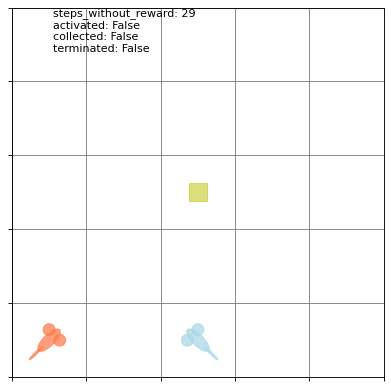

In [16]:
# Example usage:
# ani = animate_simulation_by_df(tdf, regime=3, start_frame=100, end_frame=200, grid_size=5, interval=200)
ani = animate_simulation_by_df(tdf, regime=0, start_frame=100, end_frame=200, grid_size=5, interval=200)
HTML(ani.to_jshtml())

In [ ]:
# Save as GIF
gif_filename = "regime_0_training.gif"
ani.save(gif_filename, writer=PillowWriter(fps=3))

print(f"Animation saved as {gif_filename}")